# Challenge Human Activity Data Set Exploration
In this notebook, we explore the compiled human activity data set from the data collected by groups of students with mobile phones.

In [1]:
import warnings
import numpy as np
import pandas as pd

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

warnings.simplefilter("ignore")

''' Let's define the converters to load the time series data.

In [2]:
np_cols = ["x-acc", "y-acc", "z-acc", 
           "x-gyro", "y-gyro", "z-gyro", 
           "x-mag", "y-mag", "z-mag", 
           "lat", "lon", "speed"]
converters = {col : lambda val: None if len(val) == 0 else np.array(eval(val)) for col in np_cols}

### Let's load the the annotated time series data.

In [3]:
df = pd.read_csv("../datasets/har_challenge_no_labels.csv.gz", converters=converters, compression="gzip")

### Let's define a function to visualise some example multivariate recordings.

In [4]:
def plot_activity_data(
    ts_name, sensor_names, T, sample_rate = 50, font_size=14):
    fig, axes = plt.subplots(len(T), sharex=True, gridspec_kw={'hspace': .15}, figsize=(20, len(T) * 1))
    
    for ts, sensor, ax in zip(T, sensor_names, axes):
        if ts is not None:
            ax.plot(ts)
        ax.set_ylabel(sensor, fontsize=font_size)
            
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(font_size)

        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(font_size)

    axes[0].set_title(ts_name, fontsize=font_size)
    axes[-1].set_xticklabels([f"{int(tick / sample_rate)}s" for tick in  axes[-1].get_xticks()])
    return ax

### Now, let's select an examplary subject and routine (0-249) and visualise the corresponding recording.

In [5]:

@interact(selection=range(len(df)))
def inspect(selection = 0):
    row = df.iloc[selection,:]
    ax = plot_activity_data(f"Location {row.location} Subject {row.subject} Routine {row.routine}", 
                   df.columns[3:15], row.iloc[3:15])
    plt.show()

interactive(children=(Dropdown(description='selection', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

### Let's visualize by time series length.

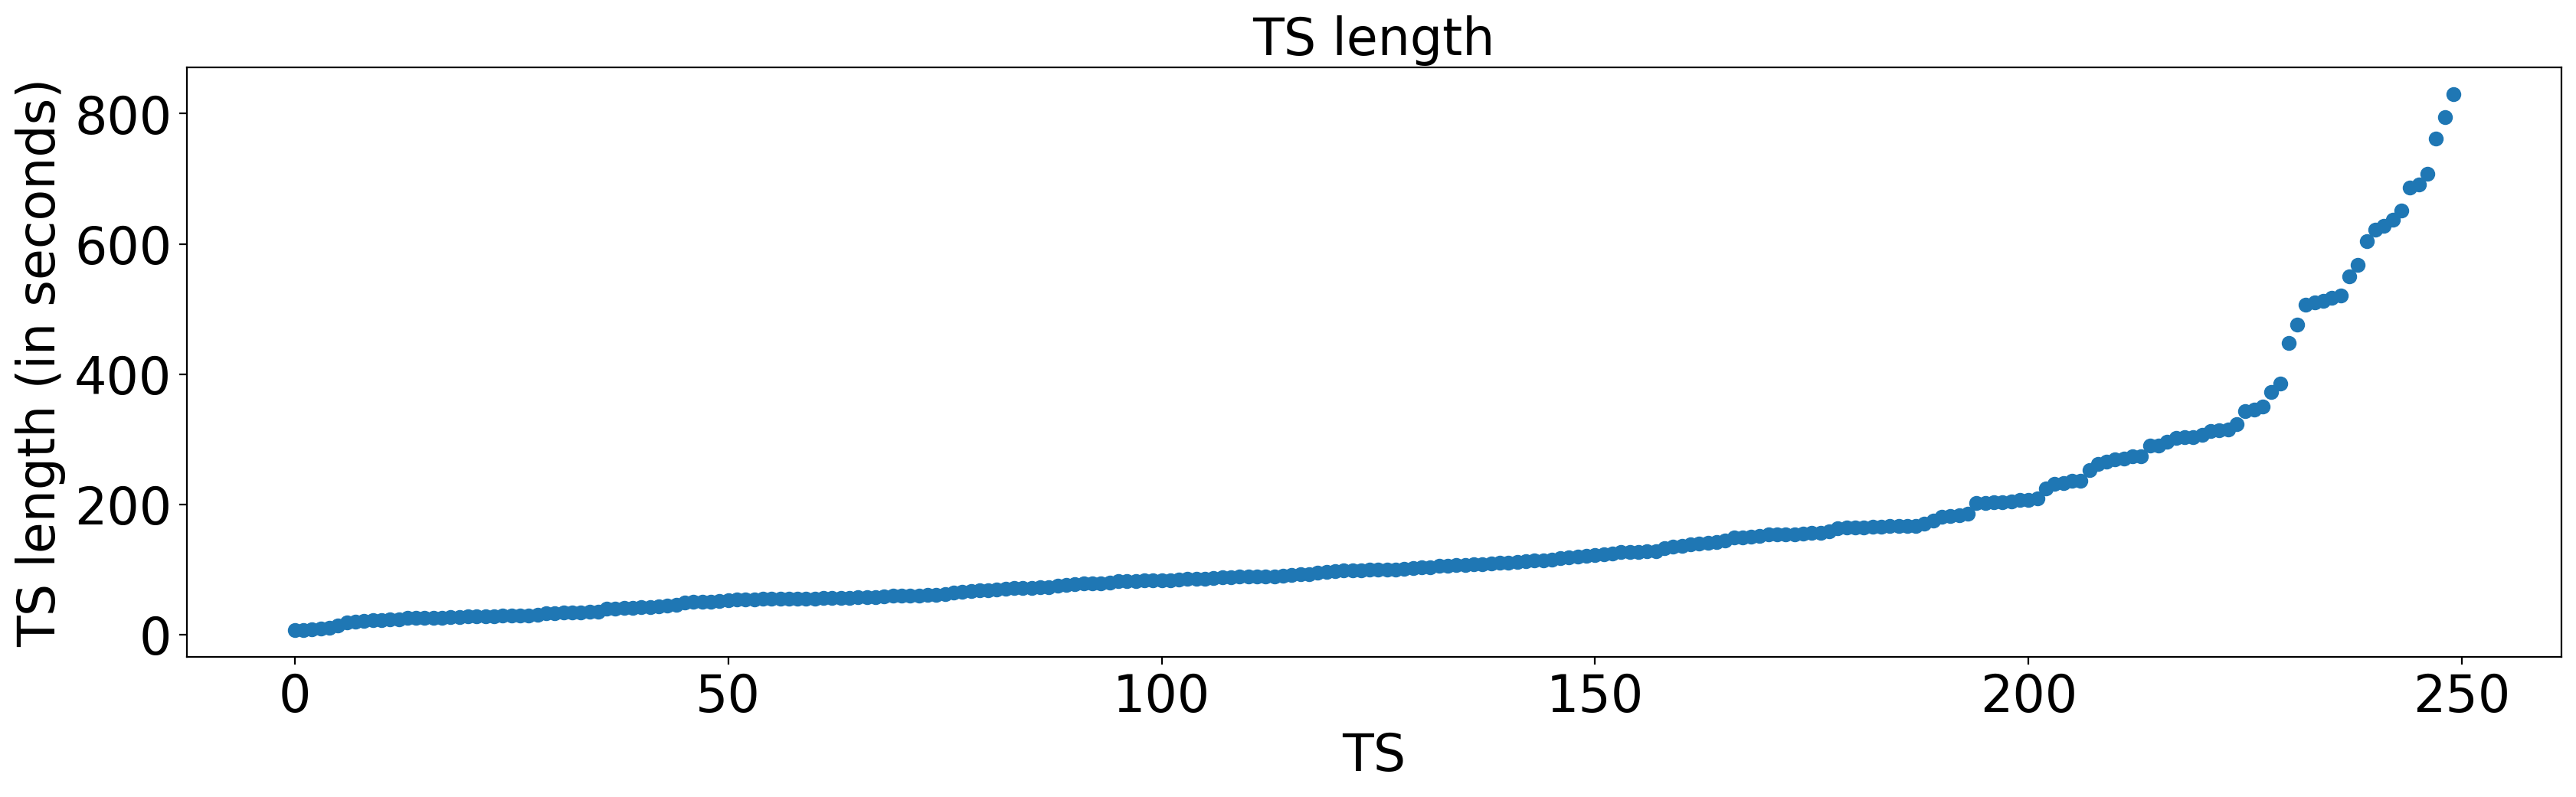

In [6]:
fontsize = 24
_, ax = plt.subplots(1, figsize=(20,5))

tslen_arg_sorted = np.argsort(df["x-acc"].apply(len))
ax.scatter(np.arange(0, df.shape[0]), df["x-acc"].apply(len).iloc[tslen_arg_sorted])

ax.set_xlabel("TS", fontsize=fontsize)
ax.set_ylabel("TS length (in seconds)", fontsize=fontsize)
ax.set_title("TS length", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_yticks(np.arange(0, 40_000+1, 10_000))
sample_rate = 50
ax.set_yticklabels(labels=[f"{round((x / 50))}" for x in np.arange(0, 40_000+1, 10_000)])
plt.show()